In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import wine data
wine_df = pd.read_csv('winemag-data.csv')

In [3]:
#create function that returns new data set from for wines from a country
def country_select(country):
    new_df = wine_df.loc[lambda df: wine_df['country'] == country]
    return new_df

In [4]:
#select only wines from the US
us_df = country_select('US')
us_df.groupby(['province']).size().sort_values(ascending=False)[:4]

province
California    44508
Washington     9750
Oregon         4589
New York       2428
dtype: int64

In [5]:
california = us_df.loc[us_df['province'] == 'California']
washington = us_df.loc[us_df['province'] == 'Washington']
oregon = us_df.loc[us_df['province'] == 'Oregon']
new_york = us_df.loc[us_df['province'] == 'New York']
top_two = pd.merge(california, washington, how='outer')
top_three = pd.merge(top_two, oregon, how='outer')
top_four = pd.merge(top_three, new_york, how='outer')

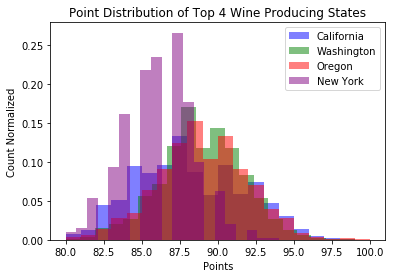

In [6]:
plt.hist(california['points'], color='blue', alpha=0.5, label='California', bins=20, normed=True)
plt.hist(washington['points'], color='green', alpha=0.5, label='Washington', bins=20, normed=True)
plt.hist(oregon['points'], color='red', alpha=0.5, label='Oregon', bins=20, normed=True)
plt.hist(new_york['points'], color='purple', alpha=0.5, label='New York', bins=20, normed=True)
plt.ylabel('Count Normalized')
plt.xlabel('Points')
plt.title('Point Distribution of Top 4 Wine Producing States')
plt.legend(loc='upper right')

plt.show()

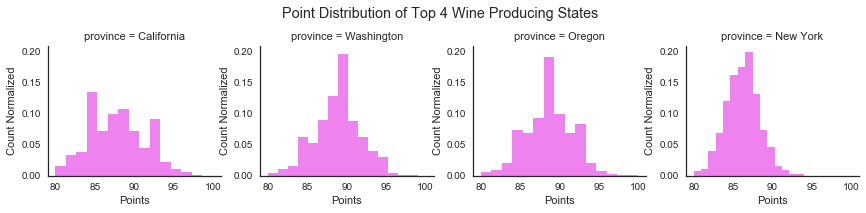

In [7]:
sns.set(style='white')

g = sns.FacetGrid(top_four, col='province')
g.map(plt.hist, 'points', color='violet', normed=True, bins=15)
g.set(xlabel='Points', ylabel='Count Normalized')
plt.subplots_adjust(top=.8)
plt.suptitle('Point Distribution of Top 4 Wine Producing States')

plt.show()

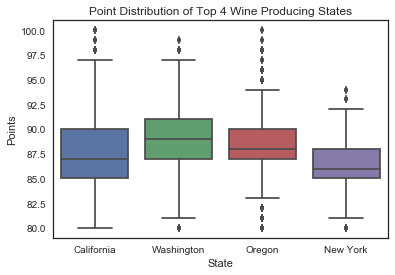

In [8]:
ax = sns.boxplot(x='province', y='points', data=top_four)
ax.set(xlabel='State', ylabel='Points')
sns.set(style='whitegrid')
plt.title('Point Distribution of Top 4 Wine Producing States')

plt.show()

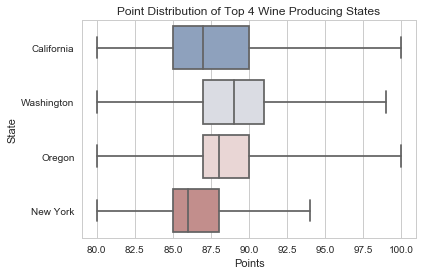

In [9]:
box = sns.boxplot(y='province', x='points', data=top_four, whis=np.inf, palette='vlag')
box.set(ylabel='State', xlabel='Points')
plt.title('Point Distribution of Top 4 Wine Producing States')

plt.show()

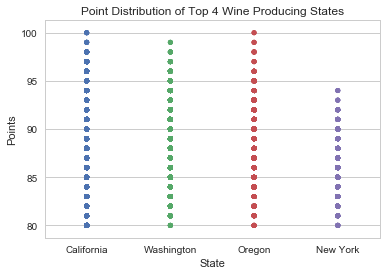

In [10]:
s = sns.stripplot(x='province', y='points', data=top_four)
s.set(xlabel='State', ylabel='Points')
sns.set(style='darkgrid')
plt.title('Point Distribution of Top 4 Wine Producing States')

plt.show()

In [15]:
california_sample = california.sample(n=100)
washington_sample = washington.sample(n=100)
oregon_sample = oregon.sample(n=100)
new_york_sample = new_york.sample(n=100)

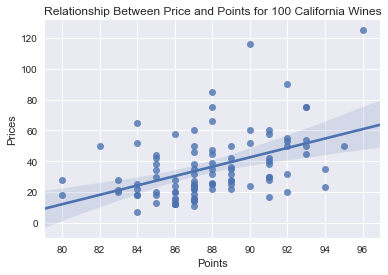

In [22]:
scatter = sns.regplot(x='points', y='price', data=california_sample)
scatter.set(xlabel='Points', ylabel='Prices')
plt.title('Relationship Between Price and Points for 100 California Wines')

plt.show()